# Alternate Distributions

This notebook creates alternate 'advertiser' distributions to test finding ideal
Tau functions.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

In [73]:
def plot_samples(samples, title, save=False):
    """Helper function to plot samples."""
    # plot two subplots: scatter plot and density contour side by side

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(title, fontsize=16)
    # scatter plot

    ax[0].scatter(samples[:, 0], samples[:, 1], alpha=0.5)

    # histogram of the samples
    x = samples[:, 0]
    y = samples[:, 1]

    # perform kernel density estimation
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)

    # create a grid over the data range
    xgrid = np.linspace(x.min(), x.max(), 1000)
    ygrid = np.linspace(y.min(), y.max(), 1000)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde(np.vstack([Xgrid.ravel(), Ygrid.ravel()])).reshape(Xgrid.shape)

    # plot contour
    ax[1].contourf(Xgrid, Ygrid, Z, levels=20, cmap='plasma')

    if save:
        filename = title.replace(' ', '_').lower() + '.png'
        os.makedirs("./data/figures/", exist_ok=True)
        plt.savefig(f"./data/figures/{filename}", dpi=600)
    else:
        plt.tight_layout()
        plt.show()



def generate_samples(distributions, sample_size = 1000):
    num_distributions = len(distributions)
    # equal weight for all distributions
    coefficients = [1.0 / num_distributions] * num_distributions

    data = np.zeros((sample_size, 2, num_distributions))
    print(data.shape)
    for i, distr in enumerate(distributions):
        data[:, :, i] = distr['type'](size = (sample_size,), **distr['params'])
    random_idx = np.random.choice(np.arange(num_distributions), size=sample_size, p=coefficients)
    samples = data[np.arange(sample_size), :, random_idx]
    return samples

def save_samples(samples, title):
    """Helper function to save samples to a file."""
    filename = title.replace(' ', '_').lower() + '.csv'
    np.savetxt(f"data/samples/{filename}", samples, delimiter=',', header='e_score,v_score', comments='')

## Single Modal Normal Distribution

This distribution is a single modal 2d normal distribution with a mean of 0 and a standard deviation of 100,000.

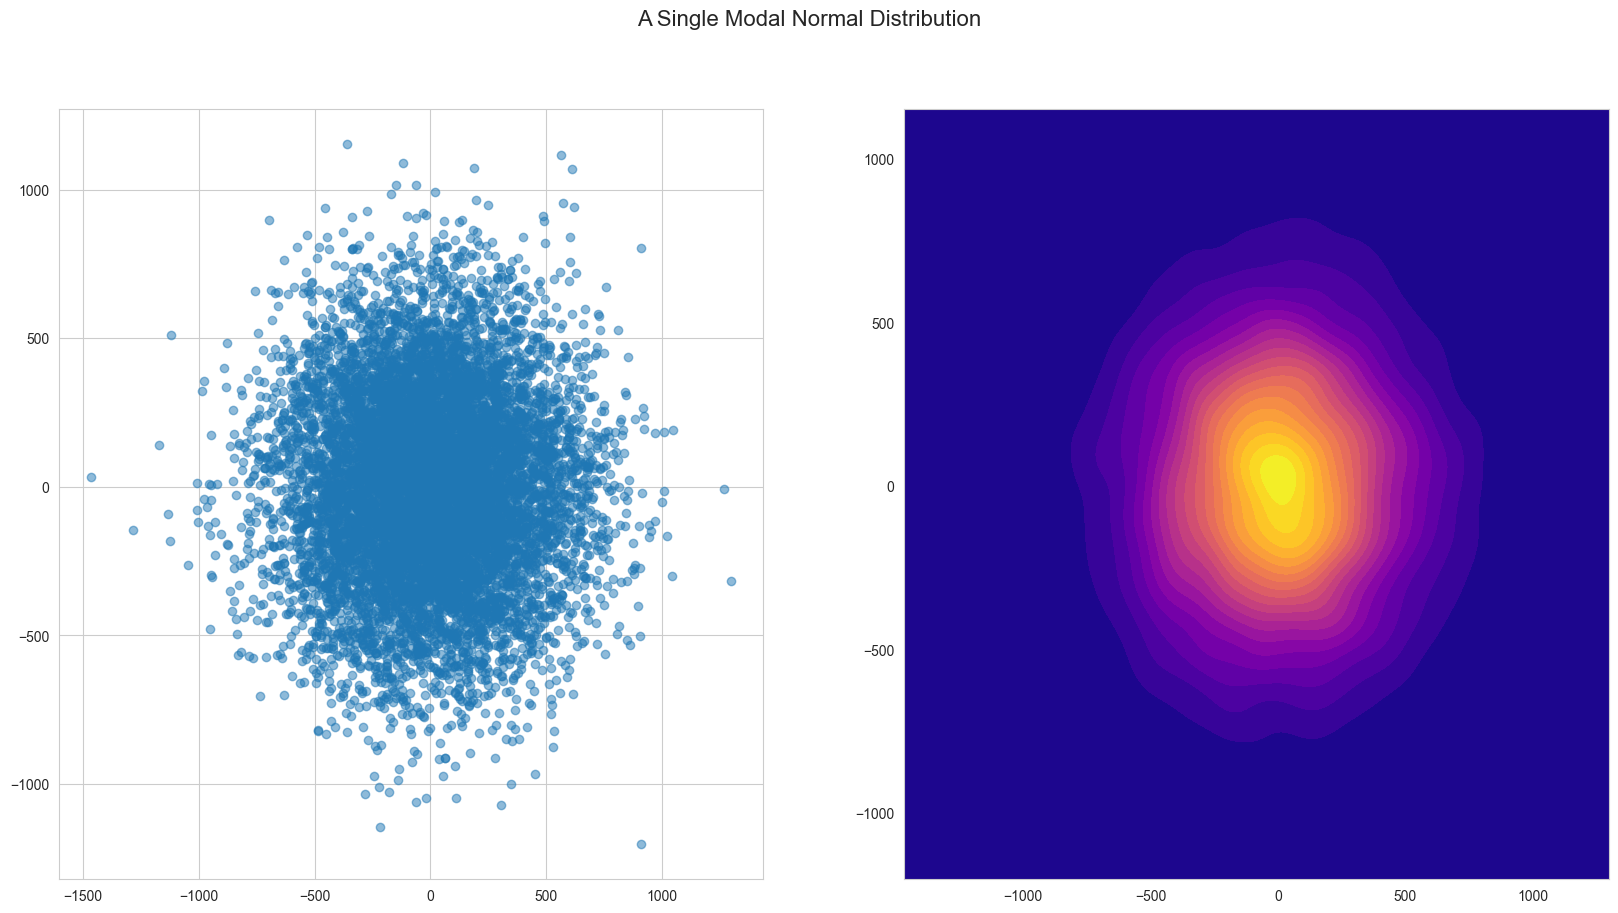

In [74]:
mean = [0, 0]
cov = [[100000, 0], [0, 100000]]  # diagonal covariance
sample_size = 10000
samples = np.random.multivariate_normal(mean, cov, sample_size)
title = 'A Single Modal Normal Distribution'

plot_samples(samples, title, save=True)
save_samples(samples, title)

## Two Modal Normal Distribution (Side by Side)
This distribution combines two normal distributions, one centered at (-100, 0) and the other at (100, 0), both with a standard deviation of 50,000.


(10000, 2, 2)


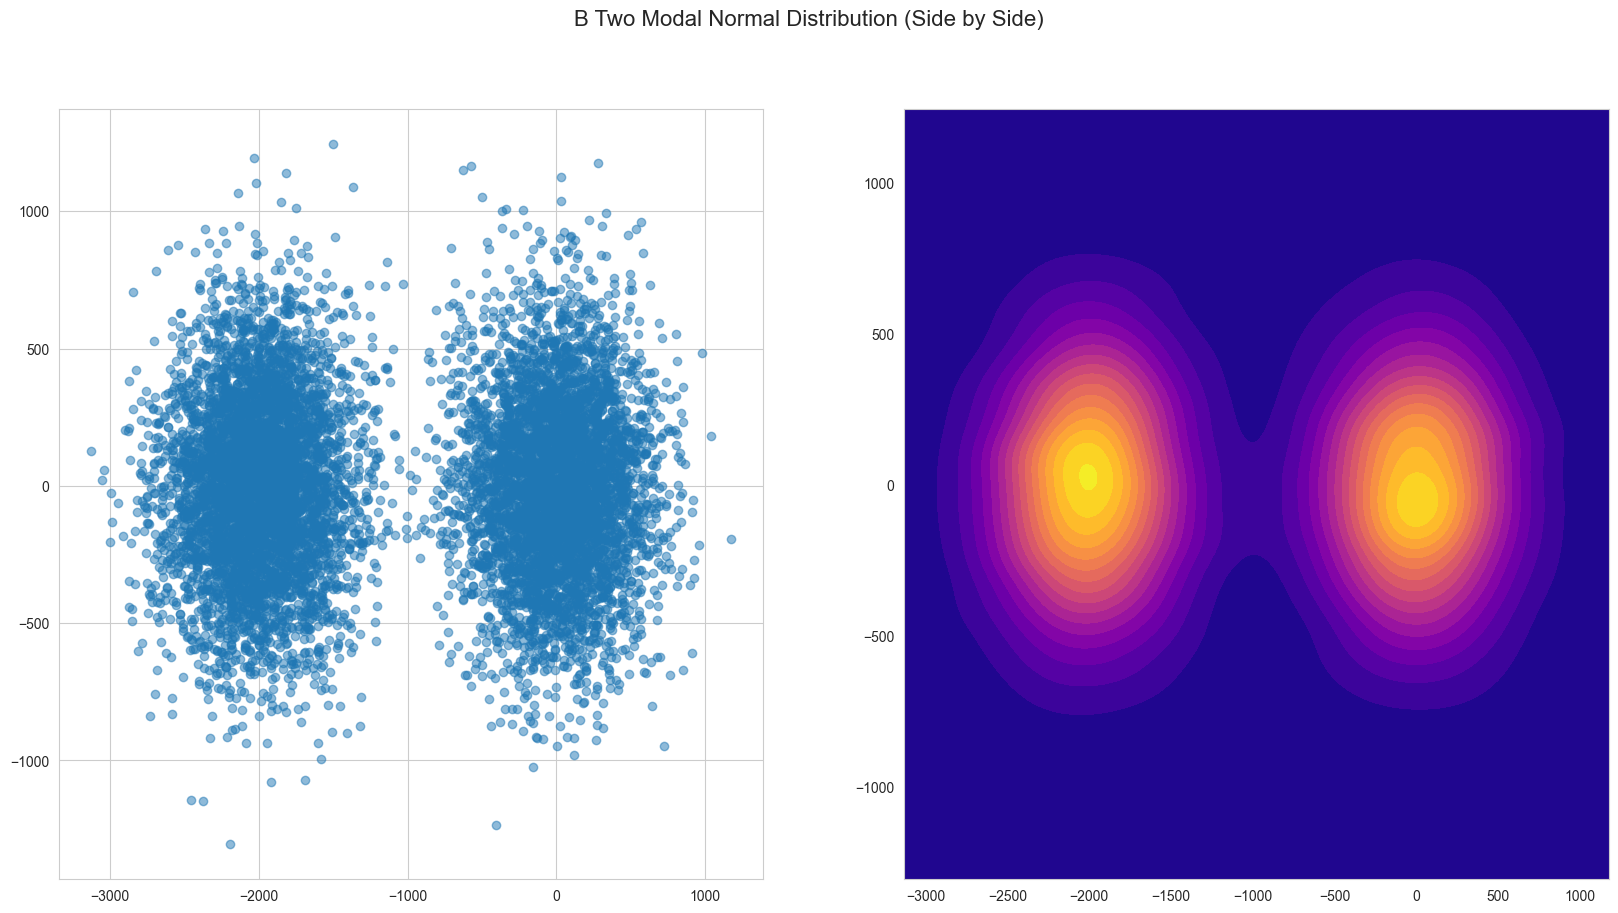

In [75]:
distributions = [
    {'type': np.random.multivariate_normal, 'params': {'mean': [-2000, 0], 'cov': [[100000, 0], [0, 100000]]}},
    {'type': np.random.multivariate_normal, 'params': {'mean': [0, 0], 'cov': [[100000, 0], [0, 100000]]}},
    ]
sample_size = 10000

samples = generate_samples(distributions, sample_size)

title = 'B Two Modal Normal Distribution (Side by Side)'
plot_samples(samples, title, save=True)
save_samples(samples, title)

## Two Modal Normal Distribution (Diagonal /)

(10000, 2, 2)


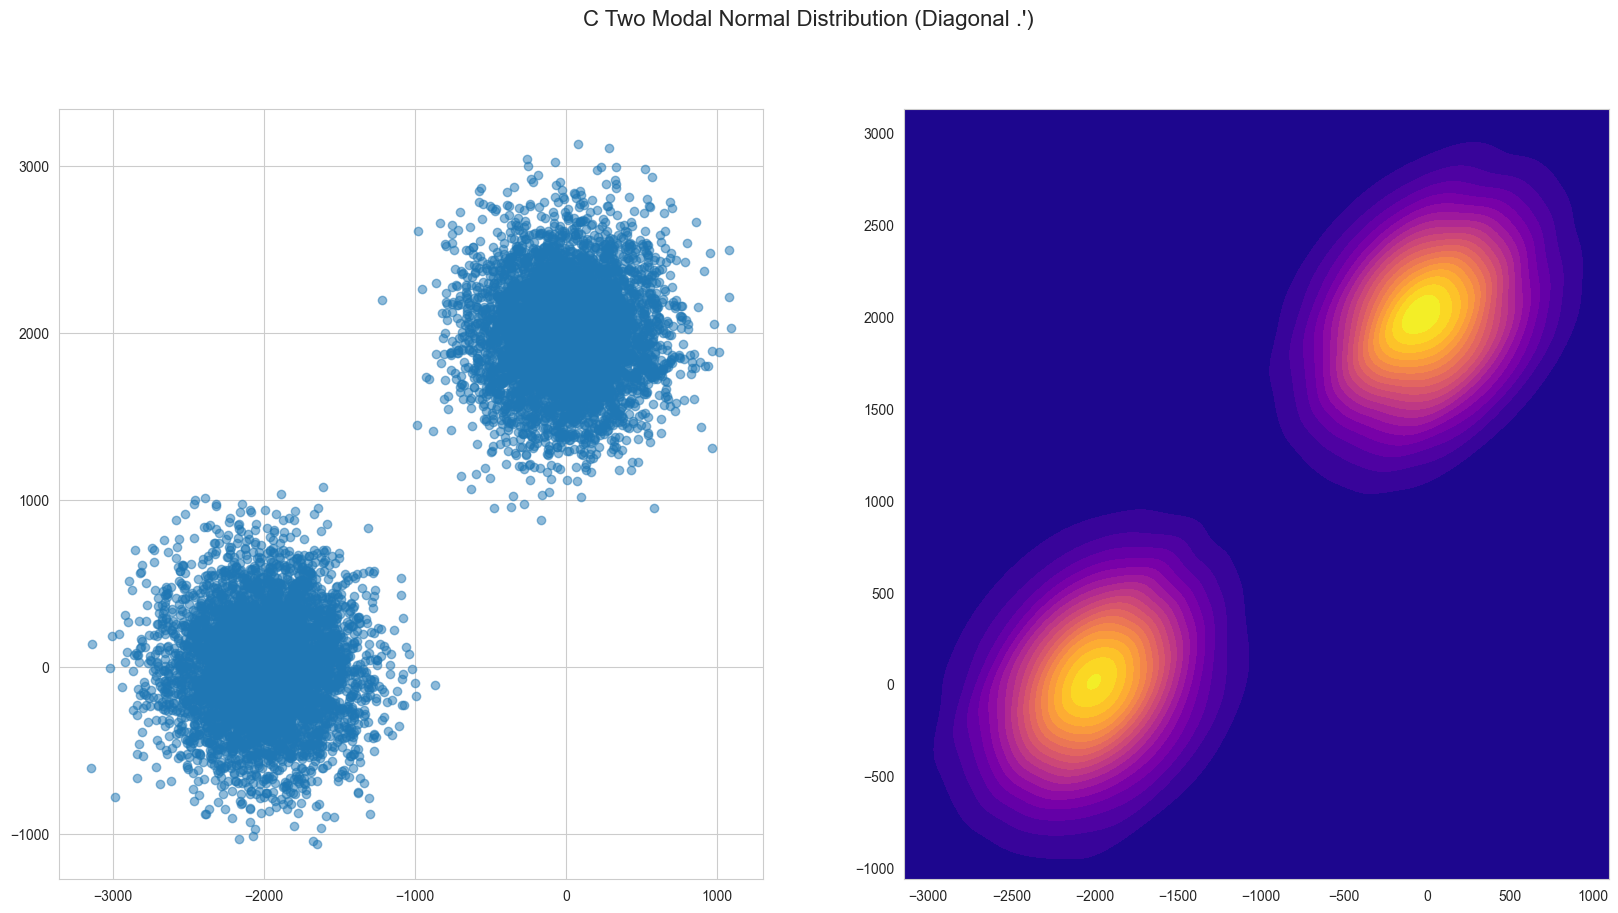

In [77]:
distributions = [
    {'type': np.random.multivariate_normal, 'params': {'mean': [-2000, 0], 'cov': [[100000, 0], [0, 100000]]}},
    {'type': np.random.multivariate_normal, 'params': {'mean': [0, 2000], 'cov': [[100000, 0], [0, 100000]]}},
    ]
sample_size = 10000

samples = generate_samples(distributions, sample_size)

title = "C Two Modal Normal Distribution (Diagonal .')"
plot_samples(samples, title, save=True)
save_samples(samples, title)

## Two Modal Normal Distribution (Diagonal \\)

(10000, 2, 2)


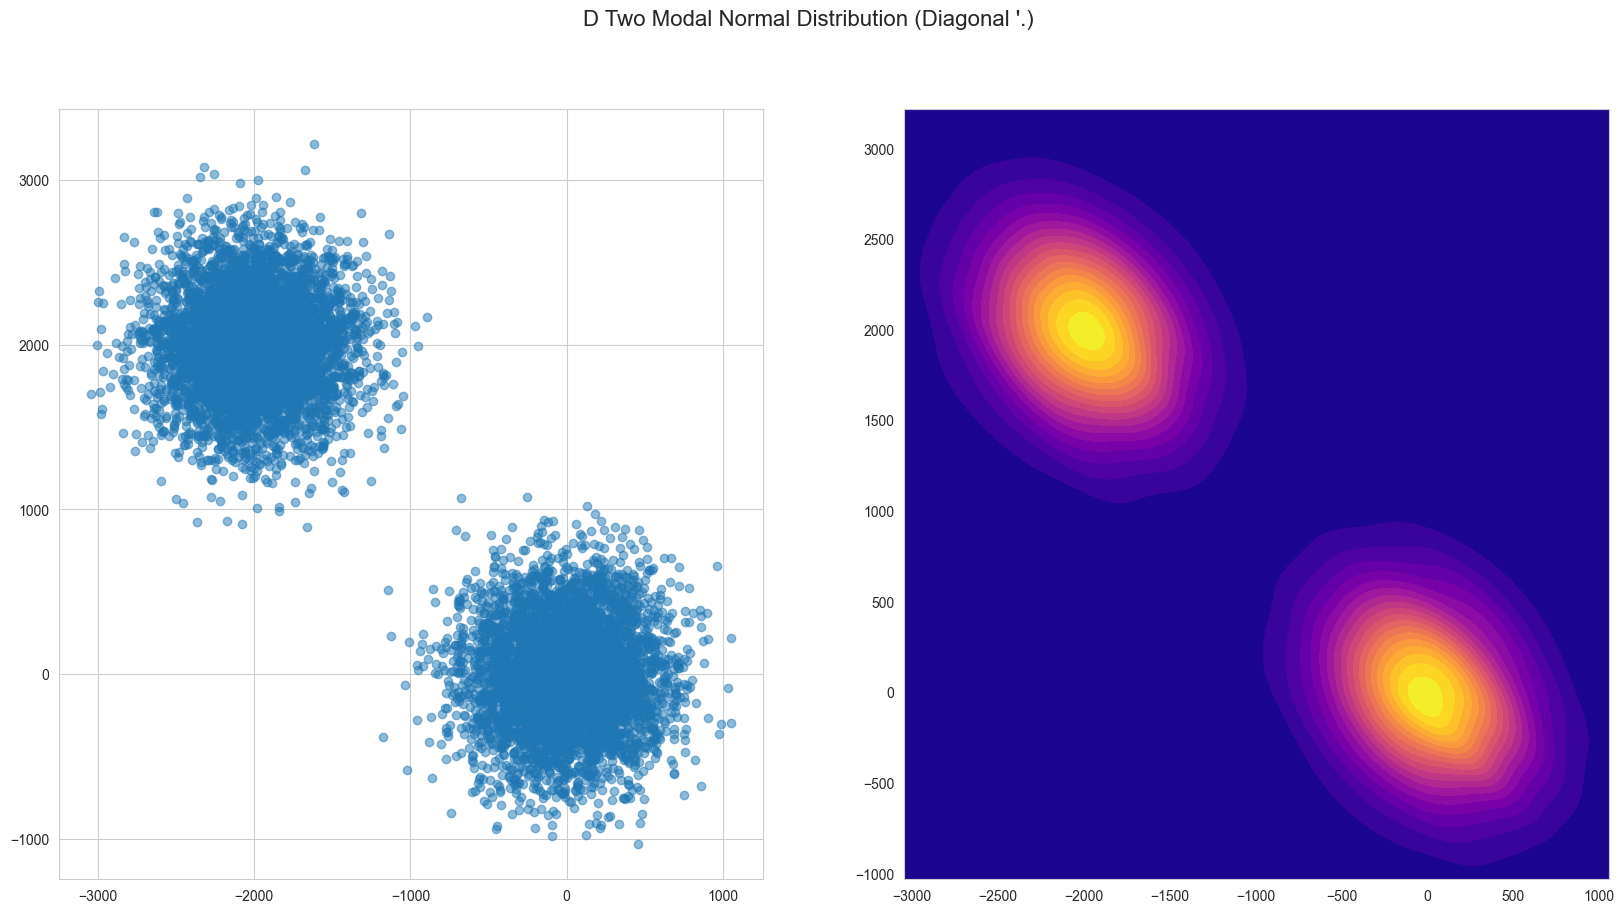

In [78]:
distributions = [
    {'type': np.random.multivariate_normal, 'params': {'mean': [-2000, 2000], 'cov': [[100000, 0], [0, 100000]]}},
    {'type': np.random.multivariate_normal, 'params': {'mean': [0, 0], 'cov': [[100000, 0], [0, 100000]]}},
    ]
sample_size = 10000

samples = generate_samples(distributions, sample_size)

title = "D Two Modal Normal Distribution (Diagonal '.)"
plot_samples(samples, title, save=True)
save_samples(samples, title)

## Two Modal Normal Distribution (Stacked)

(10000, 2, 2)


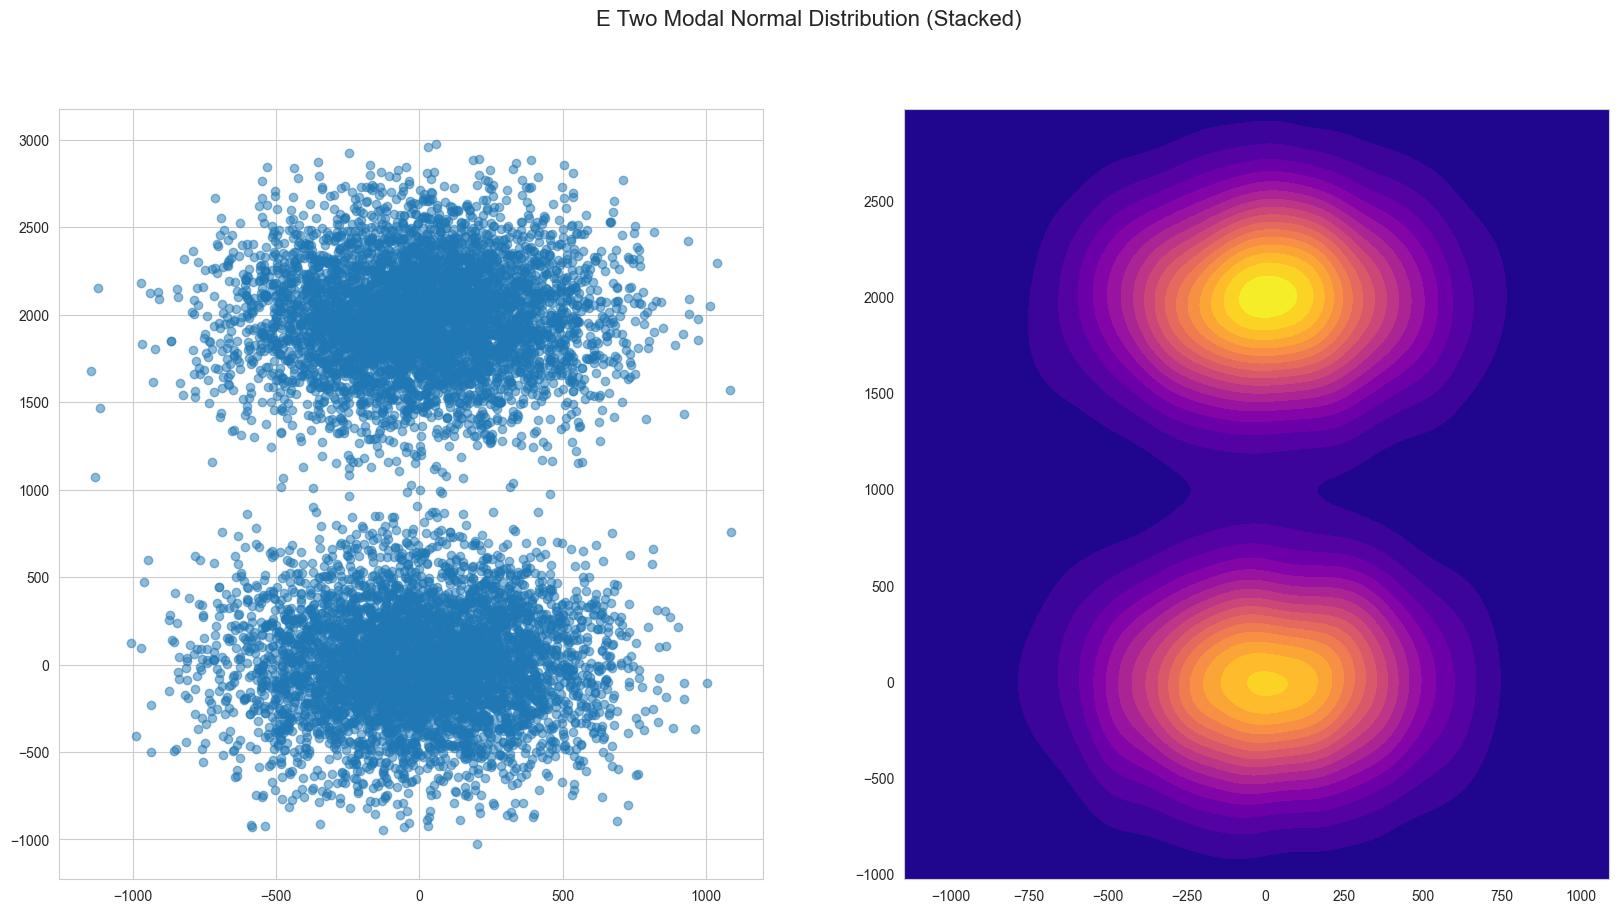

In [79]:
distributions = [
    {'type': np.random.multivariate_normal, 'params': {'mean': [0, 2000], 'cov': [[100000, 0], [0, 100000]]}},
    {'type': np.random.multivariate_normal, 'params': {'mean': [0, 0], 'cov': [[100000, 0], [0, 100000]]}},
    ]
sample_size = 10000

samples = generate_samples(distributions, sample_size)

title = 'E Two Modal Normal Distribution (Stacked)'
plot_samples(samples, title, save=True)
save_samples(samples, title)

## Four Modal Normal Distribution

(10000, 2, 4)


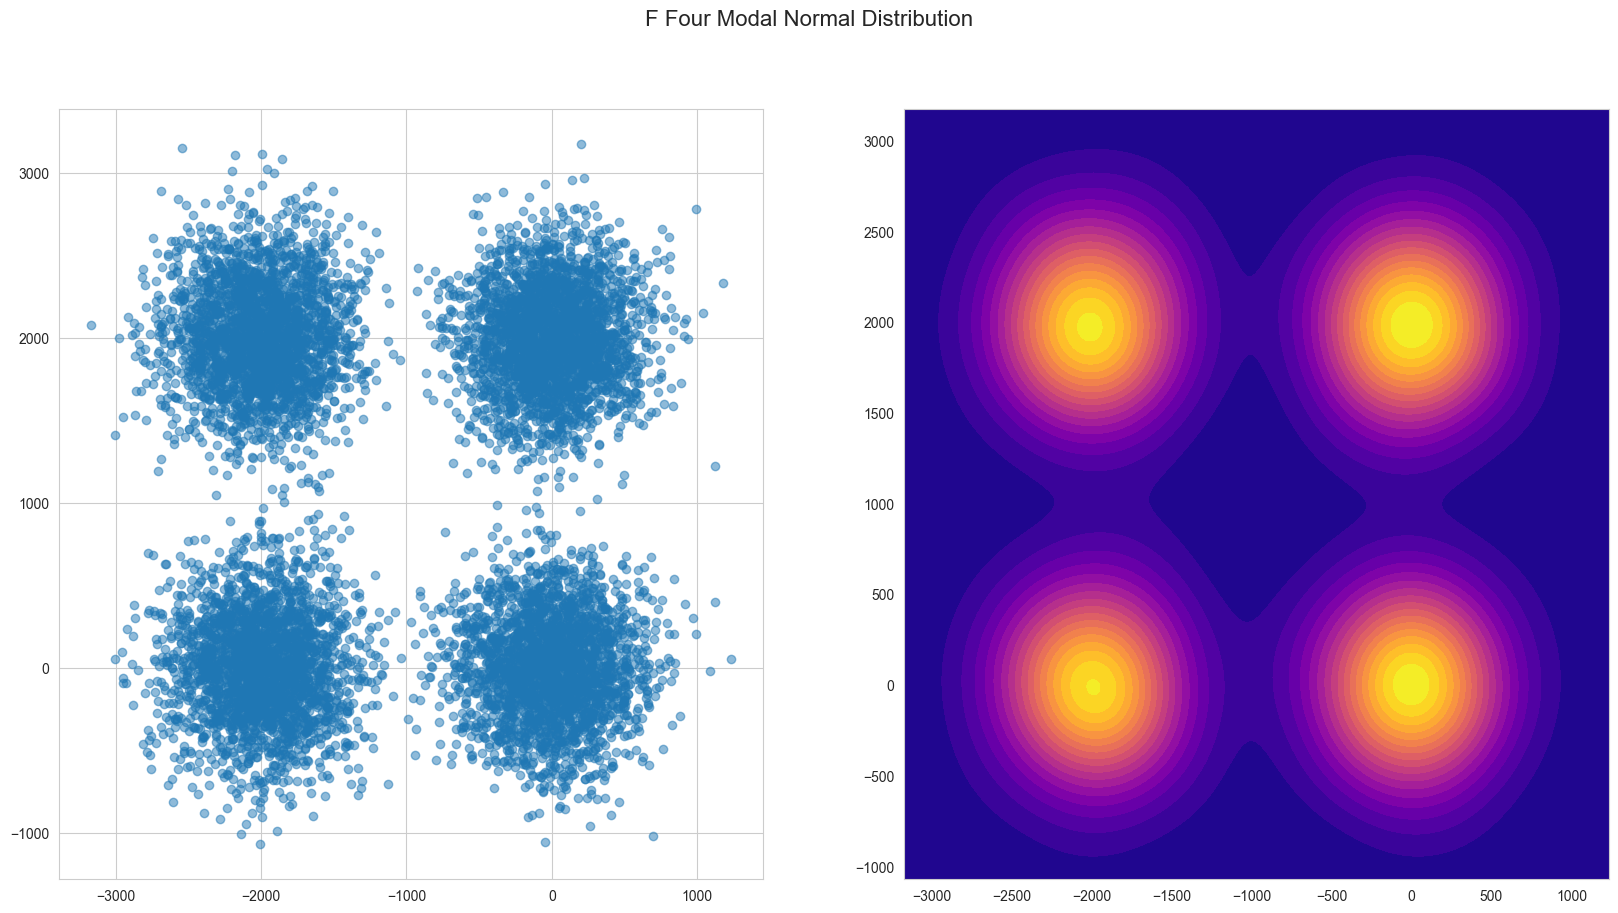

In [80]:
distributions = [
    {'type': np.random.multivariate_normal, 'params': {'mean': [-2000, 0], 'cov': [[100000, 0], [0, 100000]]}},
    {'type': np.random.multivariate_normal, 'params': {'mean': [-2000, 2000], 'cov': [[100000, 0], [0, 100000]]}},
    {'type': np.random.multivariate_normal, 'params': {'mean': [0, 2000], 'cov': [[100000, 0], [0, 100000]]}},
    {'type': np.random.multivariate_normal, 'params': {'mean': [0, 0], 'cov': [[100000, 0], [0, 100000]]}},
    ]
sample_size = 10000

samples = generate_samples(distributions, sample_size)

title = 'F Four Modal Normal Distribution'
plot_samples(samples, title, save=True)
save_samples(samples, title)